# STA 141B: Homework 1
Winter 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Zihao

Last Name: Chen

Student ID: 915490404

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: The Doomsday Algorithm

The Doomsday algorithm, devised by mathematician J. H. Conway, computes the day of the week any given date fell on. The algorithm is designed to be simple enough to memorize and use for mental calculation.

__Example.__ With the algorithm, we can compute that July 4, 1776 (the day the United States declared independence from Great Britain) was a Thursday.

The algorithm is based on the fact that for any year, several dates always fall on the same day of the week, called the <em style="color:#F00">doomsday</em> for the year. These dates include 4/4, 6/6, 8/8, 10/10, and 12/12.

__Example.__ The doomsday for 2016 is Monday, so in 2016 the dates above all fell on Mondays. The doomsday for 2017 is Tuesday, so in 2017 the dates above will all fall on Tuesdays.

The doomsday algorithm has three major steps:

1. Compute the anchor day for the target century.
2. Compute the doomsday for the target year based on the anchor day.
3. Determine the day of week for the target date by counting the number of days to the nearest doomsday.

Each step is explained in detail below.

### The Anchor Day

The doomsday for the first year in a century is called the <em style="color:#F00">anchor day</em> for that century. The anchor day is needed to compute the doomsday for any other year in that century. The anchor day for a century $c$ can be computed with the formula:
$$
a = \bigl( 5 (c \bmod 4) + 2 \bigr) \bmod 7
$$
The result $a$ corresponds to a day of the week, starting with $0$ for Sunday and ending with $6$ for Saturday.

__Note.__ The modulo operation $(x \bmod y)$ finds the remainder after dividing $x$ by $y$. For instance, $12 \bmod 3 = 0$ since the remainder after dividing $12$ by $3$ is $0$. Similarly, $11 \bmod 7 = 4$, since the remainder after dividing $11$ by $7$ is $4$.

__Example.__ Suppose the target year is 1954, so the century is $c = 19$. Plugging this into the formula gives
$$a = \bigl( 5 (19 \bmod 4) + 2 \bigr) \bmod 7 = \bigl( 5(3) + 2 \bigr) \bmod 7 = 3.$$
In other words, the anchor day for 1900-1999 is Wednesday, which is also the doomsday for 1900.

__Exercise 1.1.__ Write a function that accepts a year as input and computes the anchor day for that year's century. The modulo operator `%` and functions in the `math` module may be useful. Document your function with a docstring and test your function for a few different years.  Do this in a new cell below this one.

In [1]:
def anchor(year):
    "Compute the Anchor Day for the century"
    a=(5*(int(year/100)%4)+2)%7#the function int(x/100) is to get the century.
    return a;

In [2]:
anchor(1954)
#the result already shown in the question

3

In [3]:
anchor(1630)
#(5(16mod4)+2)mod7=2 mod 7=2

2

### The Doomsday

Once the anchor day is known, let $y$ be the last two digits of the target year. Then the doomsday for the target year can be computed with the formula:
$$d = \left(y + \left\lfloor\frac{y}{4}\right\rfloor + a\right) \bmod 7$$
The result $d$ corresponds to a day of the week.

__Note.__ The floor operation $\lfloor x \rfloor$ rounds $x$ down to the nearest integer. For instance, $\lfloor 3.1 \rfloor = 3$ and $\lfloor 3.8 \rfloor = 3$.

__Example.__ Again suppose the target year is 1954. Then the anchor day is $a = 3$, and $y = 54$, so the formula gives
$$
d = \left(54 + \left\lfloor\frac{54}{4}\right\rfloor + 3\right) \bmod 7 = (54 + 13 + 3) \bmod 7 = 0.
$$
Thus the doomsday for 1954 is Sunday.

__Exercise 1.2.__ Write a function that accepts a year as input and computes the doomsday for that year. Your function may need to call the function you wrote in exercise 1.1. Make sure to document and test your function.

In [4]:
def doomsday(year):
    "Compute the Doomsday"
    #year//100 is similar to int(x/100). it is also to get the century.
    y=year-100*(year//100)#get the last two digits of the year,
    d=(y+y//4+anchor(year))%7
    return d;

In [5]:
doomsday(1954)
#it is shown in the question

0

In [6]:
doomsday(1630)
#a=anchor(1630)=2 as shown in the previous cell
#d=(30+round down(30/4)+2) mod 7 = (30+7+2) mod 7= 39 mod 7 = 4

4

### The Day of Week

The final step in the Doomsday algorithm is to count the number of days between the target date and a nearby doomsday, modulo 7. This gives the day of the week.

Every month has at least one doomsday:
* (regular years) 1/10, 2/28
* (leap years) 1/11, 2/29
* 3/21, 4/4, 5/9, 6/6, 7/11, 8/8, 9/5, 10/10, 11/7, 12/12

__Example.__ Suppose we want to find the day of the week for 7/21/1954. The doomsday for 1954 is Sunday, and a nearby doomsday is 7/11. There are 10 days in July between 7/11 and 7/21. Since $10 \bmod 7 = 3$, the date 7/21/1954 falls 3 days after a Sunday, on a Wednesday.

__Exercise 1.3.__ Write a function to determine the day of the week for a given day, month, and year. Be careful of leap years! Your function should return a string such as "Thursday" rather than a number. As usual, document and test your code.

In [7]:
#to judge if it is a leap year
def leapyear(year):
    "True for leap year, False for leap year"
    if year % 400 == 0:
        return True
    elif year % 100 == 0:
        return False
    elif year % 4 == 0:
        return True
    else:
        return False

In [8]:
#to see which day is the date.
import datetime

def fun1(input_date):
    "To find the week day of a date the valid format is M/D/YYYY, for example: 1/3/35 should be 1/3/0035"
    date=datetime.datetime.strptime(input_date,"%m/%d/%Y") #to seperate the input and return error message if the input is not a valid date
    year=date.year
    month=date.month
    day=date.day
    
    #using the doomsday list in the question
    
    list=(10,28,21,4,9,6,11,8,5,10,7,12)
    
    #Sunday is the begining of the week
    Daylist=("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
    
    if (month<3 and leapyear(year)):
        Day=(doomsday(year)+(day-list[month-1]-1))%7#Day is for the week day, like Monday
    else:
        Day=(doomsday(year)+(day-list[month-1]))%7
    Day=Daylist[Day]
    print("%s is %s"%(input_date,Day))

In [9]:
input="7/21/1954" # this is the example in the question
fun1(input)

7/21/1954 is Wednesday


In [10]:
input="1/19/2018" # it is the due date of this HW1
fun1(input)

1/19/2018 is Friday


In [11]:
input="2/29/2016" # it is a example for a leap year
fun1(input)

2/29/2016 is Monday


# <font color=red>The Error below is in purpose</font>

In [12]:
#When I enter a wrong format,it will return an Error to show the format
input="2016/2/24"
fun1(input)

ValueError: time data '2016/2/24' does not match format '%m/%d/%Y'

In [13]:
#When I enter a wrong input,it will return an Error to show it
input="L/O/L"
fun1(input)

ValueError: time data 'L/O/L' does not match format '%m/%d/%Y'

__Exercise 1.4.__ How many times did Friday the 13th occur in the years 1900-1999? Does this number seem to be similar to other centuries?

In [14]:
def fun2(century):
    "input the century and it will return the times Friday the 13th occur in that century"
    #using the doomsday list in the question
    list=(10,28,21,4,9,6,11,8,5,10,7,12)
    number=0
    for i in range(0,100):
            year=100*(century-1)+i # 20 century is 19xx
            for month in range(1,13):
                if (month<3 and leapyear(year)):
                    Day=(doomsday(year)+(13-list[month-1]-1))%7
                else:
                    Day=(doomsday(year)+(13-list[month-1]))%7
                if Day==5:
                    number+=1                   
    return number

In [15]:
fun2(20)#How many times did Friday the 13th occur in the years 1900-1999?

172

In [16]:
fun2(19)#How many times did Friday the 13th occur in the years 1800-1899?

172

In [17]:
fun2(10)

172

They are the same.

__Exercise 1.5.__ How many times did Friday the 13th occur between the year 2000 and today?

In [18]:
def fun3():
    "How many times did Friday the 13th occur between the year 2000 and today?"
    #get the date of today
    today=datetime.date.today()

    #using the doomsday list in the question  
    list=(10,28,21,4,9,6,11,8,5,10,7,12)
    
    number=0
    #How many Friday the 13th occur between the year 2000 and last year
    for year in range(2000,today.year):
        for month in range(1,13):
            if (month<3 and leapyear(year)):
                Day=(doomsday(year)+(13-list[month-1]-1))%7
            else:
                Day=(doomsday(year)+(13-list[month-1]))%7
            if Day==5:
                number+=1
                
    #the number of Friday the 13th occur between new year of this year and today
    for month in range(1,today.month+1):
        if(month<today.month or today.day>13):
            if (month<3 and leapyear(today.year)):
                Day=(doomsday(today.year)+(13-list[month-1]-1))%7
            else:
                Day=(doomsday(today.year)+(13-list[month-1]))%7
            if Day==5:
                number+=1
    return number

In [19]:
fun3()

31

## Part 2: 1978 Birthdays

__Exercise 2.1.__ The file `birthdays.txt` contains the number of births in the United States for each day in 1978. Inspect the file to determine the format. Note that columns are separated by the tab character, which can be entered in Python as `\t`. Write a function that uses iterators and list comprehensions with the string methods `split()` and `strip()` to  convert each line of data to the list format

```Python
[month, day, year, count]
```
The elements of this list should be integers, not strings. The function `read_birthdays` provided below will help you load the file.

In [1]:
def read_birthdays(file_path=""):
    """Read the contents of the birthdays file into a string.
    
    Arguments:
        file_path (string): The path to the birthdays file.
        
    Returns:
        string: The contents of the birthdays file.
    """
    with open(file_path) as file:
        return file.read()

__Exercise 2.2.__ Which month had the most births in 1978? Which day of the week had the most births? Which day of the week had the fewest? What conclusions can you draw? You may find the `Counter` class in the `collections` module useful.

In [20]:
#read the txt and change the format
with open("birthdays.txt") as file:
    data=[content.strip() for content in file]

#print(data1[:20]) this code is used to make sure the begining of the data without the header.

print(data[6])# the begining of the data
print(data[370])# the end of the data,370=6+365-1 and i make sure there are nothing behind by using "print(data[371])"

#change the format as question mentioned [month, day, year, count] for each elements
import re
birthday=[]
for i in data[6:370]:
    birthday.append(list(map(int,re.split("/|\t",i))))

print(birthday[0:5]) # to check everything is fine

1/1/78	7701
12/31/78	8028
[[1, 1, 78, 7701], [1, 2, 78, 7527], [1, 3, 78, 8825], [1, 4, 78, 8859], [1, 5, 78, 9043]]


In [21]:
from collections import Counter
month=Counter()
for i in range(0,len(birthday)):
    month[birthday[i][0]]+=birthday[i][3]
#Which month had the most births in 1978?
print(month.most_common()[0][0])


8


In [22]:
day_week=Counter()
#let's see which day of the week is 1/1/1978?
fun1("1/1/1978")#it happen to be Sunday

Daylist=("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")

for i in range(0,len(birthday),7):
    for j in range(0,7):
        day_week[Daylist[j]]+=birthday[i+j][3]
#Which month had the most births in 1978?
print("%s had the most births with %s births"%(day_week.most_common()[0][0],day_week.most_common()[0][1]))
#Which month had the fewest births in 1978?
print("%s had the fewest births with %s births"%(day_week.most_common()[-1][0],day_week.most_common()[-1][1]))

1/1/1978 is Sunday
Tuesday had the most births with 504858 births
Sunday had the fewest births with 413372 births


__Exercise 2.3.__ What would be an effective way to present the information in exercise 2.2? You don't need to write any code for this exercise, just discuss what you would do.

The first idea come to my mind is the bar chart and the line chart

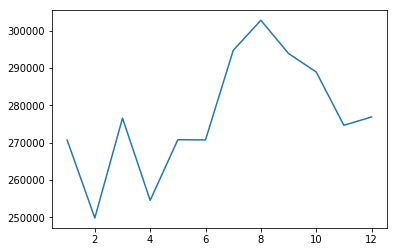

In [23]:
import matplotlib.pyplot as plt
plt.plot(month.keys(),month.values())
plt.show()

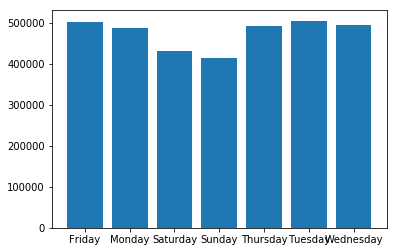

In [24]:
plt.bar(day_week.keys(),day_week.values())
plt.show()
#the day of week is not in order, need further adjustment.